<a href="https://colab.research.google.com/github/AleCongi/Esame-ICON-/blob/main/ICON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ICON

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

tot=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eventsFixed.csv')

tot.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,fun,food,culture,isOpen,isMusic,text
0,1000187186721956,1,0,1,-1,0,Martedi 05 gennaio super tombolata al Barfly!\...
1,1007051849450711,0,0,0,-1,0,NaN
2,100731190460200,0,0,1,-1,1,"Ingresso free senza obbligo di consumazione,se..."
3,1014507045355357,0,0,0,-1,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,1015563648832823,0,0,1,-1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,1021806692027608,0,0,0,-1,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
6,1023358881203820,1,0,0,-1,0,Quest'anno in occasione di san Valentino il ri...
7,1026307021482635,1,0,1,-1,0,Menu adulti 30.00\nMenu bambini 15.00
8,1026761354178792,1,0,1,-1,0,Menu adulti 30.00\nMenu bambini 15.00
9,103006560538403,0,1,1,-1,1,La 1 Esposizione dei disegni di DIPSTER accomp...


In [5]:
tot.count()

id         7688
fun        7688
food       7688
culture    7688
isOpen     7688
isMusic    7688
text       7170
dtype: int64

È chiaro che ci siano dei testi nulli. È possibile che siano eventi senza descrizione. Me ne accerto:

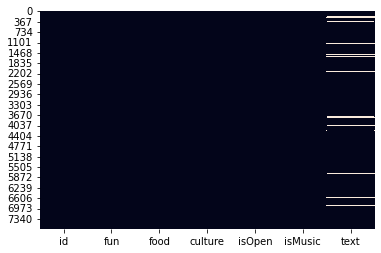

In [6]:
sb.heatmap(tot.isna(), cbar=False)

##Quickfix

Sapendo che "id" è la nostra colonna primaria, controllo che il numero di valori unici nella colonna primaria sia uguale al numero di righe. Questo mi permette di accertarmi di non avere la stessa riga per più di una volta nel mio dataset.

In [7]:
tot['id'].nunique() == len(tot['id'])

False

In [8]:
for index, row in tot.iterrows():
  
  try:
    trashId = row['id']
    trash = row['text'].lower()
  except AttributeError as ae:
    tot.drop(tot[tot['id'] == trashId].index, inplace=True)

tot = tot.drop_duplicates(subset="id", keep='last')
tot = tot.drop_duplicates(subset="text", keep='last')

In [9]:
tot['id'].nunique() == len(tot['id'])

True

In [10]:
tot.count()

id         6327
fun        6327
food       6327
culture    6327
isOpen     6327
isMusic    6327
text       6327
dtype: int64

droppiamo

In [11]:
tot.drop('isOpen',inplace=True,axis=1)
tot.drop('id',inplace=True,axis=1)
tot

,fun,food,culture,isMusic,text
0,1,0,1,0,Martedi 05 gennaio super tombolata al Barfly!\...
2,0,0,1,1,"Ingresso free senza obbligo di consumazione,se..."
3,0,0,0,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,0,0,1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,0,0,0,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
...,...,...,...,...,...
7683,0,0,0,1,Hot Club Roma Trio\n\nMoreno Viglione chitarra...
7684,0,1,0,0,"Presentazione del libro:\n ""Tasmania"" (Einaudi..."
7685,0,1,1,1,In occasione delle GIORNATE EUROPEE DEL PATRIM...
7686,0,0,1,0,Vieni a Danzare gratuitamente per un giorno co...


In [12]:
'''from imblearn.under_sampling import RandomUnderSampler
colonna_bilanciamento = tot["fun"]
classe_da_bilanciare = tot[colonna_bilanciamento == 0]

# Crea un'istanza di RandomUnderSampler
rus = RandomUnderSampler()

# Esegui il re-sampling della colonna
X_resampled, y_resampled = rus.fit_resample(classe_da_bilanciare.values.reshape(-1, 1), classe_da_bilanciare)

# Sostituisci i valori bilanciati nella colonna originale
tot.loc[tot[colonna_bilanciamento == 0].index, "fun"] = X_resampled.ravel()'''

'from imblearn.under_sampling import RandomUnderSampler\ncolonna_bilanciamento = tot["fun"]\nclasse_da_bilanciare = tot[colonna_bilanciamento == 0]\n\n# Crea un\'istanza di RandomUnderSampler\nrus = RandomUnderSampler()\n\n# Esegui il re-sampling della colonna\nX_resampled, y_resampled = rus.fit_resample(classe_da_bilanciare.values.reshape(-1, 1), classe_da_bilanciare)\n\n# Sostituisci i valori bilanciati nella colonna originale\ntot.loc[tot[colonna_bilanciamento == 0].index, "fun"] = X_resampled.ravel()'

##SomePlots

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Ecco i primi elementi del dataset.

In [14]:
tot.head()

,fun,food,culture,isMusic,text
0,1,0,1,0,Martedi 05 gennaio super tombolata al Barfly!\...
2,0,0,1,1,"Ingresso free senza obbligo di consumazione,se..."
3,0,0,0,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,0,0,1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,0,0,0,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...


In [15]:
tot.dtypes

fun         int64
food        int64
culture     int64
isMusic     int64
text       object
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


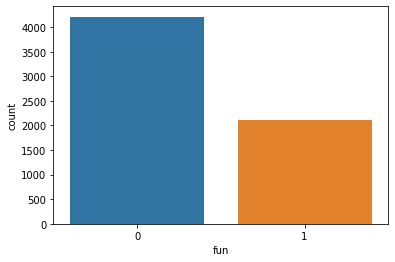

In [16]:
sns.countplot(tot['fun'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


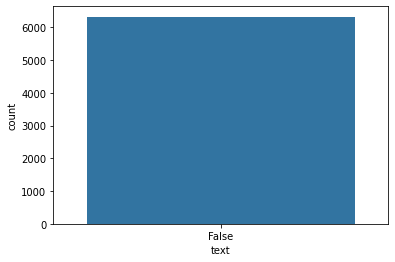

In [17]:
sns.countplot((tot["text"] == None))

##Classificatori

In [18]:
corpus = tot["text"]

###Tokenizzazione, trasformazione in sequenza e padding

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 30000

# get the raw text data

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(corpus)

sequences = tokenizer.texts_to_sequences(corpus)
#sequences_test = tokenizer.texts_to_sequences(texts_test)
seq_lens = [len(s) for s in sequences]


In [20]:
sampleIndex = 1998
print('Sequenza parola numero %s: ' % sampleIndex)
for x in sequences[sampleIndex]:
  print('%d,' % x, end =' ')

Sequenza parola numero 1998: 
2238, 555, 13051, 25474, 1501, 2238, 1945, 555, 250, 163, 314, 3, 89, 25475, 1945, 6, 1738, 5, 83, 2627, 2, 1020, 282, 25475, 1945, 1119, 801, 1, 6611, 737, 3021, 3242, 2, 17153, 4, 126, 622, 2238, 19148, 2, 4295, 1808, 6732, 8, 4, 126, 2169, 335, 47, 238, 4466, 24394, 24395, 5804, 1, 1588, 5165, 5, 366, 91, 26, 153, 282, 1, 93, 79, 18, 151, 26, 114, 9012, 208, 321, 139, 172, 9787, 208, 11003, 1158, 1210, 5917, 14583, 18451, 22, 9, 100, 831, 97, 22, 42, 13, 1690, 1, 13, 1535, 19377, 1859, 6, 1801, 1, 165, 97, 25476, 54, 17, 516, 13051, 5743, 9, 2828, 5, 158, 445, 139, 9012, 34, 1218, 5313, 6397, 24396, 

In [21]:
print('Traduzione della sequenza numero %d in parole: ' % sampleIndex)
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
" ".join([index_to_word[i] for i in sequences[sampleIndex]])

Traduzione della sequenza numero 1998 in parole: 


"carbonara day malanghino rilancia col carbonara roll day mercoledi 7 aprile il nostro carbo roll in regalo a ogni ordine di almeno 50 carbo roll pesce bianco e avocado all'interno scampi uova di quaglia la nostra salsa carbonara briciole di guanciale croccante ordina con la nostra app oppure su whatsapp 388 481 5046 delivery e take away a pranzo 12 30 14 50 e cena 19 00 23 30 dove palese san paolo bari citta modugno san girolamo santo spirito giovinazzo bitonto elenco non del tutto completo se non tra i quartieri e i paesi citati scrivici in privato e ti se arriviamo anche da te malanghino l'esperienza del giappone a casa tua bari palese via vittorio veneto 67 newopening"

Text(0.5, 1.0, 'Y documenti con X parole')

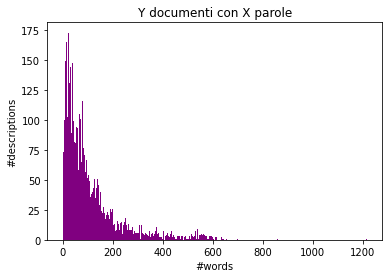

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=500, color = 'purple')
plt.xlabel('#words')
plt.ylabel('#descriptions')
plt.title('Y documenti con X parole')

In [23]:
media=np.mean(seq_lens)
print("average length: %0.1f" % media)
print("max length: %d" % max(seq_lens))
y = 0
for i in seq_lens:
  if i < media:
    y = y + 1

print("percentuale descrizioni di lunghezza inferiore ad average length: %d%%" % (int(y*100/len(seq_lens))))


average length: 112.2
max length: 1217
percentuale descrizioni di lunghezza inferiore ad average length: 67%


####Padding
La lunghezza media dei testi è di circa 112: eseguo il pad con massima lunghezza 115, valutando che la maggior parte delle descrizioni non supera quel numero di parole.

In [24]:
MAX_SEQUENCE_LENGTH = 120

# pad sequences with 0s
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of data tensor:', padded.shape)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Shape of data tensor: (6327, 120)
Found 61492 unique tokens.


In [25]:
padded[sampleIndex].shape[0]

120

###Test con alcuni classificatori (con supporto di word2vec)

In [26]:
'''import gensim.downloader as api

# Download the models (1660MB)
word2vec_model300 = api.load('word2vec-google-news-300')'''

"import gensim.downloader as api\n\n# Download the models (1660MB)\nword2vec_model300 = api.load('word2vec-google-news-300')"

In [27]:
'''
x_emb = []
for sentence in padded:
  print('sentence')
  print(sentence)
  sent_emb = [0 for k in range(300)] 
  
  num_tok = 0
  for tok in sentence:
    if tok != 0:
      word=list(word_index.keys())[list(word_index.values()).index(tok)]
      print('word: '+ word)
      try:
          emb = word2vec_model300.wv[word]
          sent_emb = [x + y for x, y in zip(sent_emb, emb)]
          num_tok = num_tok +1
      except:
          pass
  if num_tok != 0:
    final_sent_emb = [x / num_tok for x in sent_emb]         
  x_emb.append(final_sent_emb)
  

x_emb = np.array(x_emb)
with open('/content/drive/MyDrive/Colab Notebooks/embeddings.npy', 'wb') as f:
    np.save(f, x_emb)
'''
with open('/content/drive/MyDrive/Colab Notebooks/embeddings.npy', 'rb') as f:
    x_emb = np.load(f)
print(type(x_emb))
print(len(x_emb))

<class 'numpy.ndarray'>
6327


In [28]:
x_emb.shape

(6327, 300)

In [29]:
print(x_emb[sampleIndex])

[-3.05786133e-02  7.58842699e-02  6.14662170e-02  1.44120419e-01
 -1.97686282e-02  8.10065992e-02 -5.22960316e-03 -4.96363784e-02
 -2.35274344e-03  1.17864435e-01 -9.83539928e-02 -1.38018984e-01
 -1.41777270e-01  2.63907404e-02 -1.08870564e-01  1.45015832e-01
  1.37676239e-01  1.15994540e-01  2.90367820e-02  8.41785778e-02
 -1.09778664e-01 -3.43318130e-02  1.43727389e-01  8.06704434e-02
 -9.10098914e-02 -8.65139094e-02 -1.10806956e-01  9.51815518e-02
 -7.71336411e-02 -2.72553473e-02  1.11357949e-02  7.65165271e-02
  2.58844549e-02 -3.79208651e-02 -9.34795033e-02 -6.82362643e-02
 -6.14663326e-02  4.35656923e-02  9.75188631e-02 -1.69354217e-02
 -2.76641846e-02 -5.28555205e-02  1.05245879e-01  9.82952696e-02
  5.44472897e-03 -1.37826631e-01 -1.16993528e-01 -5.18678607e-02
 -2.40528222e-02  1.39574918e-01 -1.13349683e-01  1.99734775e-01
  9.40972530e-02  5.69162080e-02 -6.25702829e-02  1.85667327e-01
 -1.14800655e-01 -1.09507243e-01  5.17938787e-02 -1.35975231e-01
 -1.49469202e-01  1.08104

In [30]:
y = tot[['fun', 'food', 'culture', 'isMusic']]

In [31]:
from sklearn.decomposition import PCA
pca = PCA (170)

reduced = pca.fit_transform(x_emb)

X_reduced,X_testReduced,y_trainReduced,y_testReduced = train_test_split(reduced,y,test_size=0.25,random_state=42)
reduced.shape

(6327, 170)

In [32]:
from sklearn.utils import class_weight
weights = class_weight.compute_sample_weight(class_weight="balanced", y=y)

In [33]:
weights

array([0.84899271, 0.66966338, 1.26944883, ..., 0.82064974, 0.42600773,
       0.98964042])

####Split

In [34]:

X_train,X_test,y_train,y_test = train_test_split(x_emb,y,test_size=0.25,random_state=42)

###Da Multi-label a Multi-classe
A questo punto potremmo pensare di rappresentare il nostro Multi-Label problem come un Multi-Class binary classification problem. È utile costruire questo modello come base di confronto per i prossimi modelli: esso tratterà le label come singoli classification problems. Costruiamo il modello di base.

In [35]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 4.8 MB/s eta 0:00:00


In [36]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, hamming_loss, label_ranking_average_precision_score, precision_recall_curve, recall_score, classification_report, r2_score

#Multilable
from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset
from skmultilearn.ensemble import RakelD, RakelO, LabelSpacePartitioningClassifier
from skmultilearn.adapt import MLkNN

import matplotlib.pyplot as plt
import numpy as np

In [37]:
y_test

,fun,food,culture,isMusic
1293,1,1,1,0
7141,0,0,1,1
3846,0,0,1,1
4310,0,1,0,0
5319,0,1,0,0
...,...,...,...,...
3448,0,1,1,0
6162,0,0,0,1
1159,1,0,1,1
6140,1,1,1,1


In [38]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
biRel = BinaryRelevance(KNeighborsClassifier())
biRel2 = BinaryRelevance(SVC())
biRelRed = BinaryRelevance(SVC())

'''
BISOGNA PROVARE COMBINAZIONI FRA CLAS E MOD:
CLAS                | MOD
GaussianNB            BinaryRelevance
BernoulliNB           LabelPowerset
CategoricalNB         RakelD
SVC                   RakelO
KNeighborsClassifier  LabelSpacePartitioningClassifier
SGDClassifier         MLkNN
LogisticRegression
'''

biRel.fit(X_train,y_train)
biRel2.fit(X_train,y_train)
biRelRed.fit(X_reduced, y_trainReduced)

BinaryRelevance(classifier=SVC(), require_dense=[True, True])

In [39]:
# Predictions
prediction = biRel.predict(X_test).toarray()
prediction2 = biRel2.predict(X_test).toarray()
predictionRed = biRelRed.predict(X_testReduced).toarray()

accuracy: 0.30468
loss di hamming: 0.28097
label ranking average precision: 0.72733


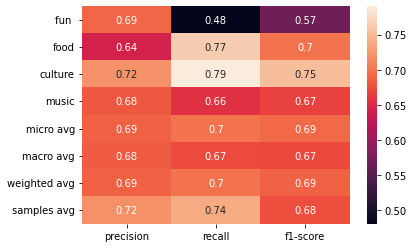

In [40]:
print('accuracy: %0.5f' % accuracy_score(y_test,prediction))
print('loss di hamming: %0.5f' % hamming_loss(y_test,prediction))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_test,prediction))
sns.heatmap(pd.DataFrame(classification_report(y_test,prediction, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

accuracy: 0.38685
loss di hamming: 0.21318
label ranking average precision: 0.78322


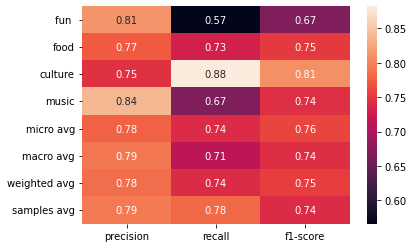

In [41]:
print('accuracy: %0.5f' % accuracy_score(y_testReduced,predictionRed))
print('loss di hamming: %0.5f' % hamming_loss(y_testReduced,predictionRed))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_testReduced,predictionRed))
sns.heatmap(pd.DataFrame(classification_report(y_testReduced,predictionRed, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

accuracy: 0.37863
loss di hamming: 0.21587
label ranking average precision: 0.77674


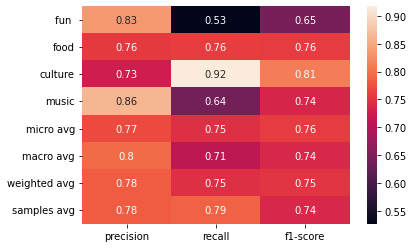

In [42]:
print('accuracy: %0.5f' % accuracy_score(y_test,prediction2))
print('loss di hamming: %0.5f' % hamming_loss(y_test,prediction2))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_test,prediction2))
sns.heatmap(pd.DataFrame(classification_report(y_test,prediction2, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

Epoch 1/30
149/149 [==============================] - 1s 3ms/step - loss: 0.6124 - accuracy: 0.2885
Epoch 2/30
149/149 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.4464
Epoch 3/30
149/149 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.4894
Epoch 4/30
149/149 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.4982
Epoch 5/30
149/149 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.5031
Epoch 6/30
149/149 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.5092
Epoch 7/30
149/149 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.5153
Epoch 8/30
149/149 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.5176
Epoch 9/30
149/149 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.5262
Epoch 10/30
149/149 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.5260

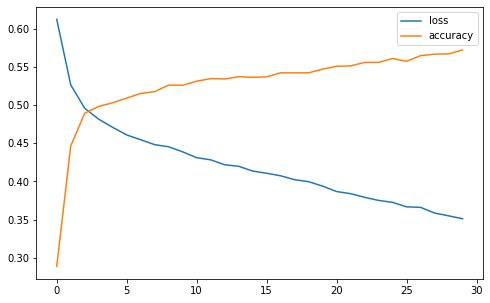

In [58]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

# get the model
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(256, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(n_outputs, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
  return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X_train, y_train, X_test, y_test):
  results = list()
  # define evaluation procedure
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  model = get_model(X_train.shape[1], y_train.shape[1])
  # fit model
  fit=model.fit(X_train, y_train, verbose=1, epochs=30)
  # make a prediction on the test set
  yhat = model.predict(X_test)
  # round probabilities to class labels
  pd.DataFrame(fit.history).plot(figsize=(8,5))
  plt.show()
  '''yhat = yhat.round()
  # calculate accuracy
  acc = accuracy_score(y_test, yhat)
  # store result
  print('>%.3f' % acc)
  results.append(acc)
  return results'''

# evaluate model
results = evaluate_model(X_train, y_train, X_test, y_test)
# summarize performance
#print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

#####Funzione per costruire il modello

In [44]:
def build_model(modello,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(modello)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result